<a href="https://colab.research.google.com/github/boniluboni/PADROES-EM-ROUBOS-E-FURTOS-DE-VEICULOS/blob/main/EDA_e_Kmeans_Roubos_e_Furtos_de_ve%C3%ADculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Implementação de algoritmo de clusterização na detecção de padrões em roubos e furtos de veículos </h2>

<p>
Estudo dos roubos e furtos de veículos em <strong>2021</strong> no Estado de São Paulo (dados SSP), integrado a variáveis de população e frota (IBGE) e investimentos em segurança (SEFAZ). Aplicou-se EDA, correlação de Spearman, Análise de Correspondência Simples e K-Means.
</p>

<h3>Principais achados</h3>
<ul>
  <li><strong>Concentração</strong> dos crimes em horários e dias específicos.</li>
  <li><strong>Maiores taxas</strong> de furtos/roubos em áreas de alta atividade econômica e distribuição desigual de recursos de segurança.</li>
</ul>

<h3>Conclusão</h3>
<p>
Distribuição estratégica e equitativa de investimentos é vital; variáveis socioeconômicas e demográficas devem orientar políticas de segurança.
</p>

<p><strong>Palavras-chave:</strong> Segurança pública; Análise exploratória; Clusterização.</p>


Dados obtidos do IBGE, PNAD, SSP e SEFAZ, referentes a 2021.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Existe uma correlação positiva (0.7965) entre o avançar das horas do dia e a quantidade de roubos de veículos. Isto significa que, conforme o dia avança, a quantidade de roubos de veículos tende a aumentar. Esta correlação é estatisticamente significativa, com um p-valor de 0.00000321, sugerindo que a relação observada não é devido ao acaso.


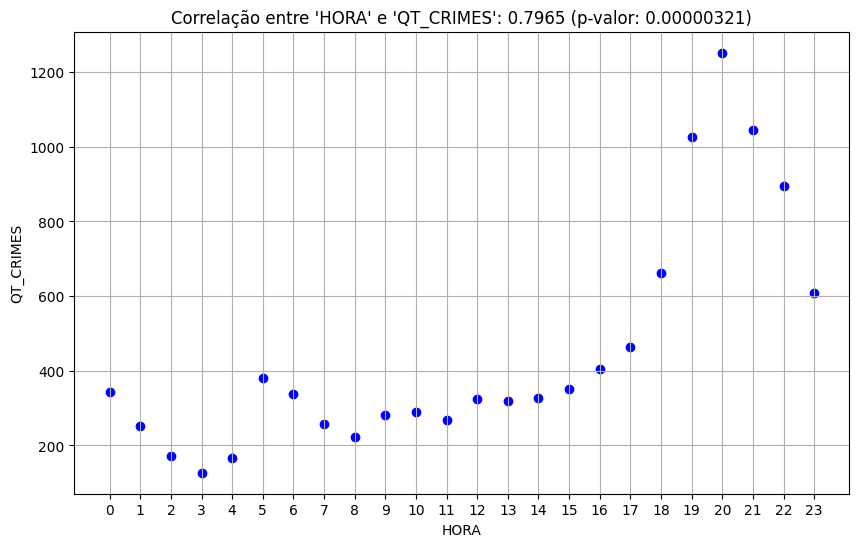

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Seus dados
data = {
    "HORA": list(range(24)),
    "QT_CRIMES": [342, 251, 172, 127, 167, 380, 338, 258, 222, 282, 289, 269, 324, 320, 326, 352, 404, 464, 663, 1026, 1252, 1045, 895, 609]
}

# Criar um DataFrame
df = pd.DataFrame(data)

# Teste de correlação e significância
correlation, correlation_p_value = spearmanr(df["HORA"], df["QT_CRIMES"])
if correlation_p_value < 0.05:
    correlation_significance = "estatisticamente significativa"
else:
    correlation_significance = "não estatisticamente significativa"

# Resultados e interpretações
correlation_formatted = f"{correlation:.4f}"  # Modificação aqui para formato decimal
p_value_formatted = f"{correlation_p_value:.8f}"  # Formatação do p-valor de forma mais amigável

# Interpretação baseada nos resultados
interpretation = ""
if correlation > 0:
    interpretation = f"Existe uma correlação positiva ({correlation_formatted}) entre o avançar das horas do dia e a quantidade de roubos de veículos. Isto significa que, conforme o dia avança, a quantidade de roubos de veículos tende a aumentar. Esta correlação é {correlation_significance}, com um p-valor de {p_value_formatted}, sugerindo que a relação observada não é devido ao acaso."
else:
    interpretation = f"Existe uma correlação negativa ({correlation_formatted}) entre o avançar das horas do dia e a quantidade de roubos de veículos. Isto significa que, conforme o dia avança, a quantidade de roubos de veículos tende a diminuir. Esta correlação é {correlation_significance}, com um p-valor de {p_value_formatted}, sugerindo que a relação observada não é devido ao acaso."

print(interpretation)

# Plotar os dados em um gráfico
plt.figure(figsize=(10, 6))
plt.scatter(df["HORA"], df["QT_CRIMES"], color='b', marker='o')
plt.title(f"Correlação entre 'HORA' e 'QT_CRIMES': {correlation_formatted} (p-valor: {p_value_formatted})")  # Corrigido 'QT_OCORRENCIAS' para 'QT_CRIMES'
plt.xlabel("HORA")
plt.ylabel("QT_CRIMES")  # Corrigido 'QT_OCORRENCIAS' para 'QT_CRIMES'
plt.xticks(df["HORA"])  # Define os valores do eixo x para serem os valores de HORA
plt.grid(True)
plt.show()


In [ ]:
correlation_p_value

3.2147317367417936e-06

In [ ]:
p_value_formatted

'0.0000'

In [ ]:
import pandas as pd

# Suponha que MODELOS_PECAS e TECNICOS já estão definidos
MODELOS_PECAS = ...  # Seu dataframe original
TECNICOS = ...  # Seu conjunto de técnicos

# Criando um novo dataframe vazio para armazenar os resultados
resultados = pd.DataFrame()

for nome in TECNICOS:
    print(nome)
    # Criando uma cópia temporária do MODELOS_PECAS para modificar
    temp_df = MODELOS_PECAS.copy()
    temp_df['TECNICO'] = nome

    # Anexando a cópia modificada ao dataframe 'resultados'
    resultados = pd.concat([resultados, temp_df], ignore_index=True)

# Agora 'resultados' contém a concatenação de todas as iterações


In [ ]:
import pandas as pd
import scipy.stats as stats
from tabulate import tabulate

# Função para calcular a correlação e o p-valor entre duas colunas do DataFrame
def calcular_correlacao(coluna1, coluna2):
    # Criar um DataFrame temporário apenas com as duas colunas para calcular a correlação
    df_temp = pd.DataFrame({coluna1.name: coluna1, coluna2.name: coluna2})

    # Calcular a correlação entre as duas colunas e obter o p-valor
    correlacao, p_valor = stats.pearsonr(coluna1, coluna2)

    return correlacao, p_valor

# Função para atribuir os rótulos de correlação
def get_correlation_label(correlation_value):
    if correlation_value == 1.0:
        return 'Perfeita'
    elif correlation_value >= 0.9:
        return 'Muito forte'
    elif correlation_value >= 0.7:
        return 'Forte'
    elif correlation_value >= 0.4:
        return 'Moderada'
    elif correlation_value >= 0.2:
        return 'Fraca'
    elif correlation_value >= 0.01:
        return 'Muito fraca'
    else:
        return 'Ausência de correlação'

# Função para interpretar o p-valor
def interpretar_p_valor(p_valor):
    if p_valor < 0.05:
        return 'Estatisticamente significativo (p-valor < 0.05)'
    else:
        return 'Não estatisticamente significativo (p-valor >= 0.05)'

# Supondo que 'df_correl' é o seu DataFrame com as colunas de interesse
#data = df_correl[['DENSIDADE_DEMOGRAFICA', 'INVESTIMENTOS_EM_SEGURANCA', 'RENDA', 'tx_ROUBO_DE_VEÍCULO_por_1000h']]
data = df[['POPULACAO','EXTENSAO_TERRITORIAL','DENSIDADE_DEMOGRAFICA','INVESTIMENTOS_EM_SEGURANCA','RENDA','tx_roubo_por_1000_veiculos', 'TOTAL_FROTA','QTD_BOLETINS']]

# Lista para armazenar os resultados
resultados = []

# Loop duplo para comparar todas as combinações possíveis de colunas
for i in range(len(data.columns)):
    coluna1 = data.iloc[:, i]
    for j in range(i + 1, len(data.columns)):
        coluna2 = data.iloc[:, j]
        correlacao, p_valor = calcular_correlacao(coluna1, coluna2)
        label = get_correlation_label(correlacao)
        p_valor_interpretado = interpretar_p_valor(p_valor)
        resultados.append({'lado_a': coluna1.name, 'lado_b': coluna2.name, 'Correlação': correlacao, 'P-valor': p_valor, 'Interpretação_correlação': label, 'Interpretação P-valor': p_valor_interpretado})

# Criar o DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)

# Formatar os valores numéricos com duas casas decimais
pd.options.display.float_format = '{:,.2f}'.format

# Imprimir o resultado usando tabulate
print(tabulate(df_resultados, headers='keys', tablefmt='grid'))

# Salvar o DataFrame df_resultados em um arquivo Excel
df_resultados.to_excel('resultados_correlacao_combinacoes_especificas.xlsx', index=False)


Transorme esta celula em markdow